(dc-losses)=
# Spannungsebenen für Gleichstromnetze

## Lernziele

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>LERNZIELE</b></div>
Das sollen Sie lernen:
    <ul>
        <li> Leitungsverluste in Abhängigkeit von der Spannungsebene ermitteln </li>
        <li> mithilfe von Theorie über elektrische Leitung und Messungen </li>
        <li> um sinnvolle Spannungsniveaus auswählen zu können </li>
    </ul>
</div>

## python konfigurieren

### Module importieren

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import locale
import distutils.spawn
from distutils.spawn import find_executable

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('locale', locale)
print('distutils.spawn', distutils.spawn)

Versionen der verwendeten python-Module: 
numpy 1.21.5
matplotlib 3.5.2
pandas 1.4.4
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda-latest/envs/22sye/lib/python3.10/locale.py'>
distutils.spawn <module 'distutils.spawn' from '/home/franzi/.pyenv/versions/miniconda-latest/envs/22sye/lib/python3.10/site-packages/setuptools/_distutils/spawn.py'>


### Grafikparameter einstellen

In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

## Spannungsebenen und Leistung

Denkt man an Gleichstromnetze in Gebäuden, so stellen sich viele Leute im ersten Schritt vor, dass es doch praktisch wäre, neben den 230 V Steckdosen auch UBS-Steckdosen zu plazieren.

Je niedriger das Spannungsniveau, desto stärker sind Stromwärmeverluste in einer Leitung. Außerdem hängen diese davon ab, wie groß der Widerstand der Leitung ist - eine Leitung mit höherem Widerstand ist in der Regel kostengünstiger als eine mit hohem Widerstand:

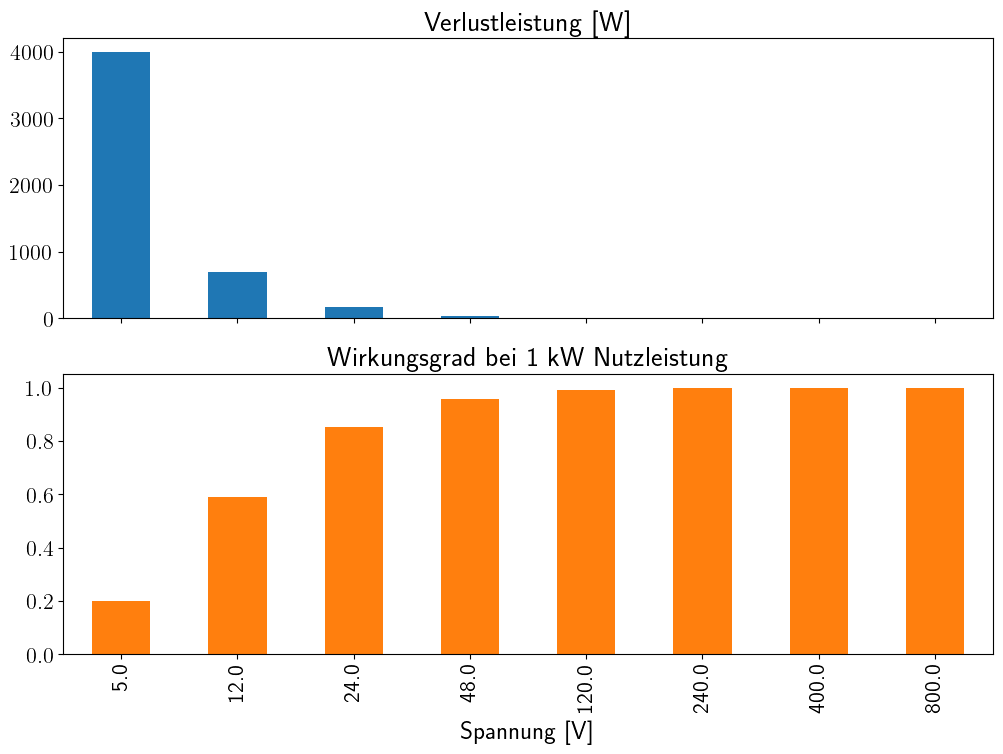

In [3]:
U = np.array([5,12,24,48,120,240,400,800], dtype=np.float32) # V
P = 1000 # W
I = P/U # A
RL = .1 # Ohm
PV = RL*I**2
data = {'Spannung [V]': U,
       'Nutzleistung [W]': P,
       'Strom [A]': I,
       'Verlustleistung [W]': PV}
df = pd.DataFrame(data)
df['Wirkungsgrad bei 1 kW Nutzleistung'] = df['Nutzleistung [W]']/(df['Nutzleistung [W]']+df['Verlustleistung [W]'])
df.plot.bar(x = 'Spannung [V]', y = ['Verlustleistung [W]','Wirkungsgrad bei 1 kW Nutzleistung'], subplots=True, legend=None, figsize=(12,8))
plt.show()

## Leitungswiderstand $R_L$ berechnen

Kabel beinhalten elektrische Leitungen. Die einfachste Variante besteht aus einer einzelnen Leitung (einadrige Kabel). Für den Anschluss an Steckdosen und standardisierte Buchsen beinhalten Kabel jedoch zumeist mindestens einen Hin- und einen Rückleiter (mind. zweiadrig), so dass der Stromkreis mit einem einzelnen Kabel geschlossen werden kann.

Daraus resultiert der **Faktor 2 für Hin- und Rückleiter**.

In [4]:
twoway = 2 # 2 für Hin- und Rückleiter, 1 für einfache Leiter

Die meisten Leitungen werden zudem aus Kupfer hergestellt, dessen spezifische Leitfähigkeit typischerweise bei $\vartheta=20..25^\circ\text{C}$ einen Wert von $\kappa_{\text{Cu},20}=58\cdot10^6 \text{ S/m}$ hat {cite:p}`wikipedia_elektrische_2021`.

In [5]:
kappacu20 = 58e6 # S/m

Erwärmt sich eine Leitung *nicht nennenswert* während der Nutzung, kann man diesen Wert so annehmen wie er ist. Falls die Erwärmung nennenswert ist, verändert sich die Leitfähigkeit: Sie sinkt mit steigender Temperatur.

Je nach gewünschter Genauigkeit und Temperaturbereich beschreibt eine lineare oder eine polynomische Kennlinie dieses Verhalten, gezeigt ist hier die lineare Kennlinie (für die polynomische bitte in der Literatur nachlesen):

\begin{equation}
R(\vartheta)=R_{20}\cdot \left[1+\alpha_{20}\cdot\left(\vartheta-20^\circ\text{C}\right)\right] 
\end{equation}

Der lineare Temperaturkoeffizient beträgt für Kupfer $\alpha_{\text{Cu},20}=3,93\cdot10^{-3}\text{ K}^{-1}$ {cite:p}`wikipedia_temperaturkoeffizient_2021`.

In [6]:
alphacu20 = 3.93e-3 # 1/K

Der Widerstand $R_{20}$ hängt zudem von der Geometrie der Leitung ab:

\begin{equation}
R_{20} = \frac{1}{\kappa_{20}}\cdot \frac{l}{A}
\end{equation}

Die Gleichung zeigt: je länger die Länge $l$ und je geringer der Querschnitt $A$ einer Leitung ist, desto höher ist der Widerstand $R_{20}$.

Somit hat eine Leitung bei $\vartheta=50^\circ\text{C}$ einen um einen Faktor $a$ höheren Widerstand als bei $\vartheta=20^\circ\text{C}$:

In [7]:
rhocu20 = 1/kappacu20 # spezifischer Widerstand
T2 = 50 # höhere Temperatur
rhocu50 = rhocu20*(1+alphacu20*(T2-20))
a = rhocu50/rhocu20
print('Der Widerstand ist bei 50°C um den Faktor', str(np.round(a,2)), 'höher als bei 20°C.')

Der Widerstand ist bei 50°C um den Faktor 1.12 höher als bei 20°C.


## Grenzen der Berechnung von Leitungsverlusten

Außer bei einfachen mehradrigen Leitungen, deren Leitungsquerschnitt auf dem Kabelmantel aufgedruckt angegeben ist, lässt sich die Leitungsgeometrie nicht so einfach ermitteln.

Auch die Temperatur der Leitung, lässt sich nicht so leicht berechnen, da die Wärmeabfuhr von der Beschaffenheit (Wärmeleitung, etc.) des Kabels abhängt und davon, wie viele stromführende (d.h. erwärmende) Adern darin sich gegenseitig erwärmen.

Es gibt neben der Energieeffizienz auch weitere Gründe, diese Erwärmung zu begrenzen: 
- mechanische Verbindungen (Stecker, Buchsen, Leiterbahnen auf/in Leiterplatten) "arbeiten" bei Temperaturänderungen - sie dehnen sich bei Erwärmung aus und ziehen sich bei Abkühlung zusammen - dieser sog. Temperaturstress belastet mechanische Verbindungen und kann dazu führen, dass schließlich die elektrische Verbindung zu dünn wird (und dadurch noch heißer) oder ganz abreißt ($\to$ Defekt)
- Isoliermaterialien sollen nicht über Gebühr erwärmt werden, weil ihre elektrische Isolationswirkung ab einer zu hohen Temperatur abnimmt und weil die Gefahr, dass Elektrobrände entstehen, steigt.

Aus Kostengründen ist es jedoch besser, möglichst wenig Metall einzusetzen und somit eher hochohmige Leitungen einzusetzen (die sich stärker erwärmen).

Für die unterschiedlichen Anwendungsgebiete (Gebäudetechnik, IT, etc.) existieren unterschiedliche zulässige Höchsttemperaturen (kurzzeitig erlaubte Temperaturen) und unterschiedliche zulässige Dauertemperaturen (dauerhaft zulässige Temperaturen).

Deren Werte finden sich in zugehörigen Normen. Die VDE-Normen können Sie online (im VPN bzw. TH-Netz) über die Normenbibliothek finden.

## Messwerte aus der Literatur für lange USB-C-Kabel

Wie oben beschrieben, geht der Widerstandswert und damit die Verluste einer Leitung linear mit der Länge nach oben.

{cite:p}`andrijan_mocker_fernbestromung_2021` zeigt Verluste von USB-C-Kabeln ab einer Länge von drei Metern. **Unterschiedliche Fabrikate wiesen Verluste zwischen 2% und 38% auf**. Dies zeigt, dass eine Messung sich lohnen kann und bestätigt, dass USB (5 V) nicht sinnvoll ist über längere Distanzen!

```{bibliography}
:filter: docname in docnames
```